# House Price Prediction

## Import Libraries

In [64]:
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings

import seaborn as sns
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
df = pd.read_csv("data.csv")

## Data Preprocessing

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Feature Engineering

In [ ]:
df.corr(numeric_only=True)

# pandas.DataFrame.corr
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

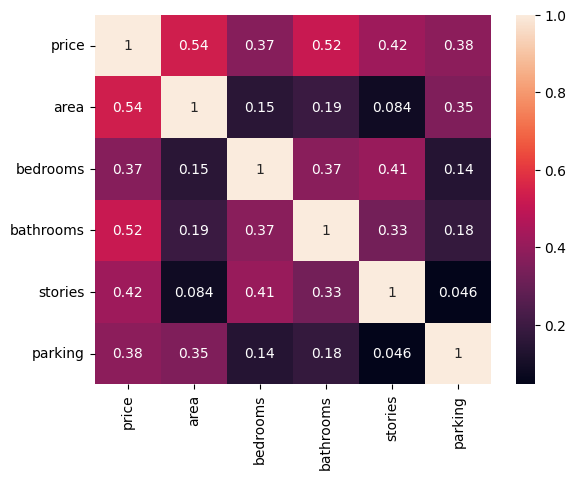

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

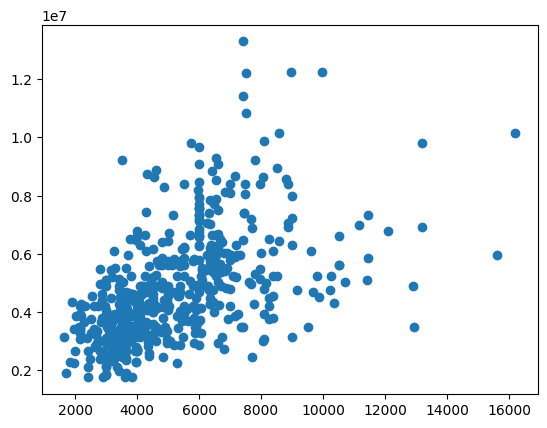

In [11]:
plt.scatter(df['area'],df['price'])

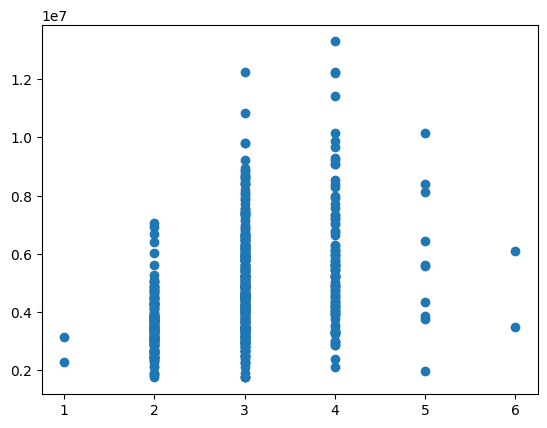

In [13]:
plt.scatter(df['bedrooms'],df['price'])

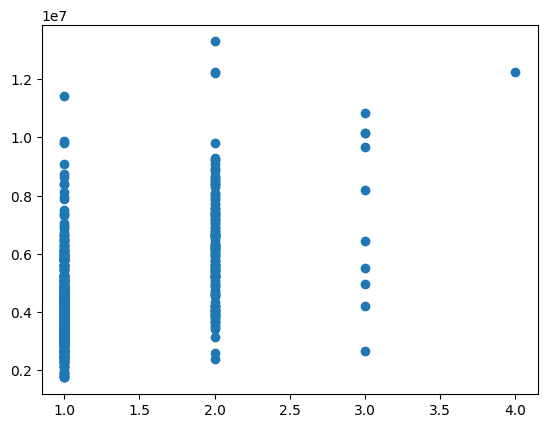

In [14]:
plt.scatter(df['bathrooms'],df['price'])

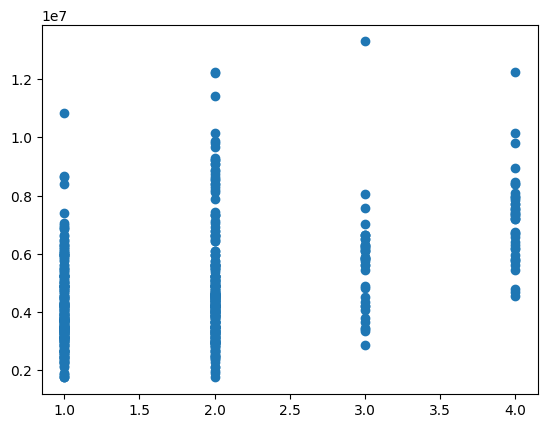

In [15]:
plt.scatter(df['stories'],df['price'])

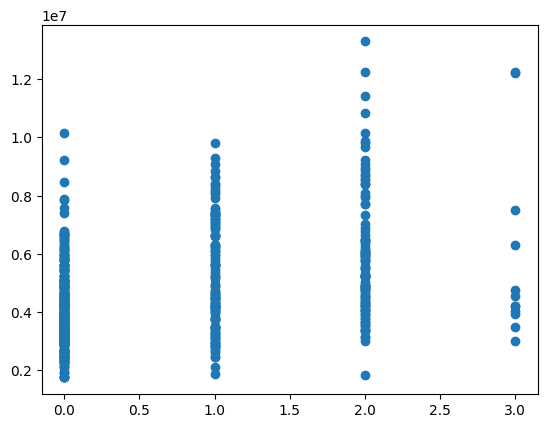

In [16]:
plt.scatter(df['parking'],df['price'])

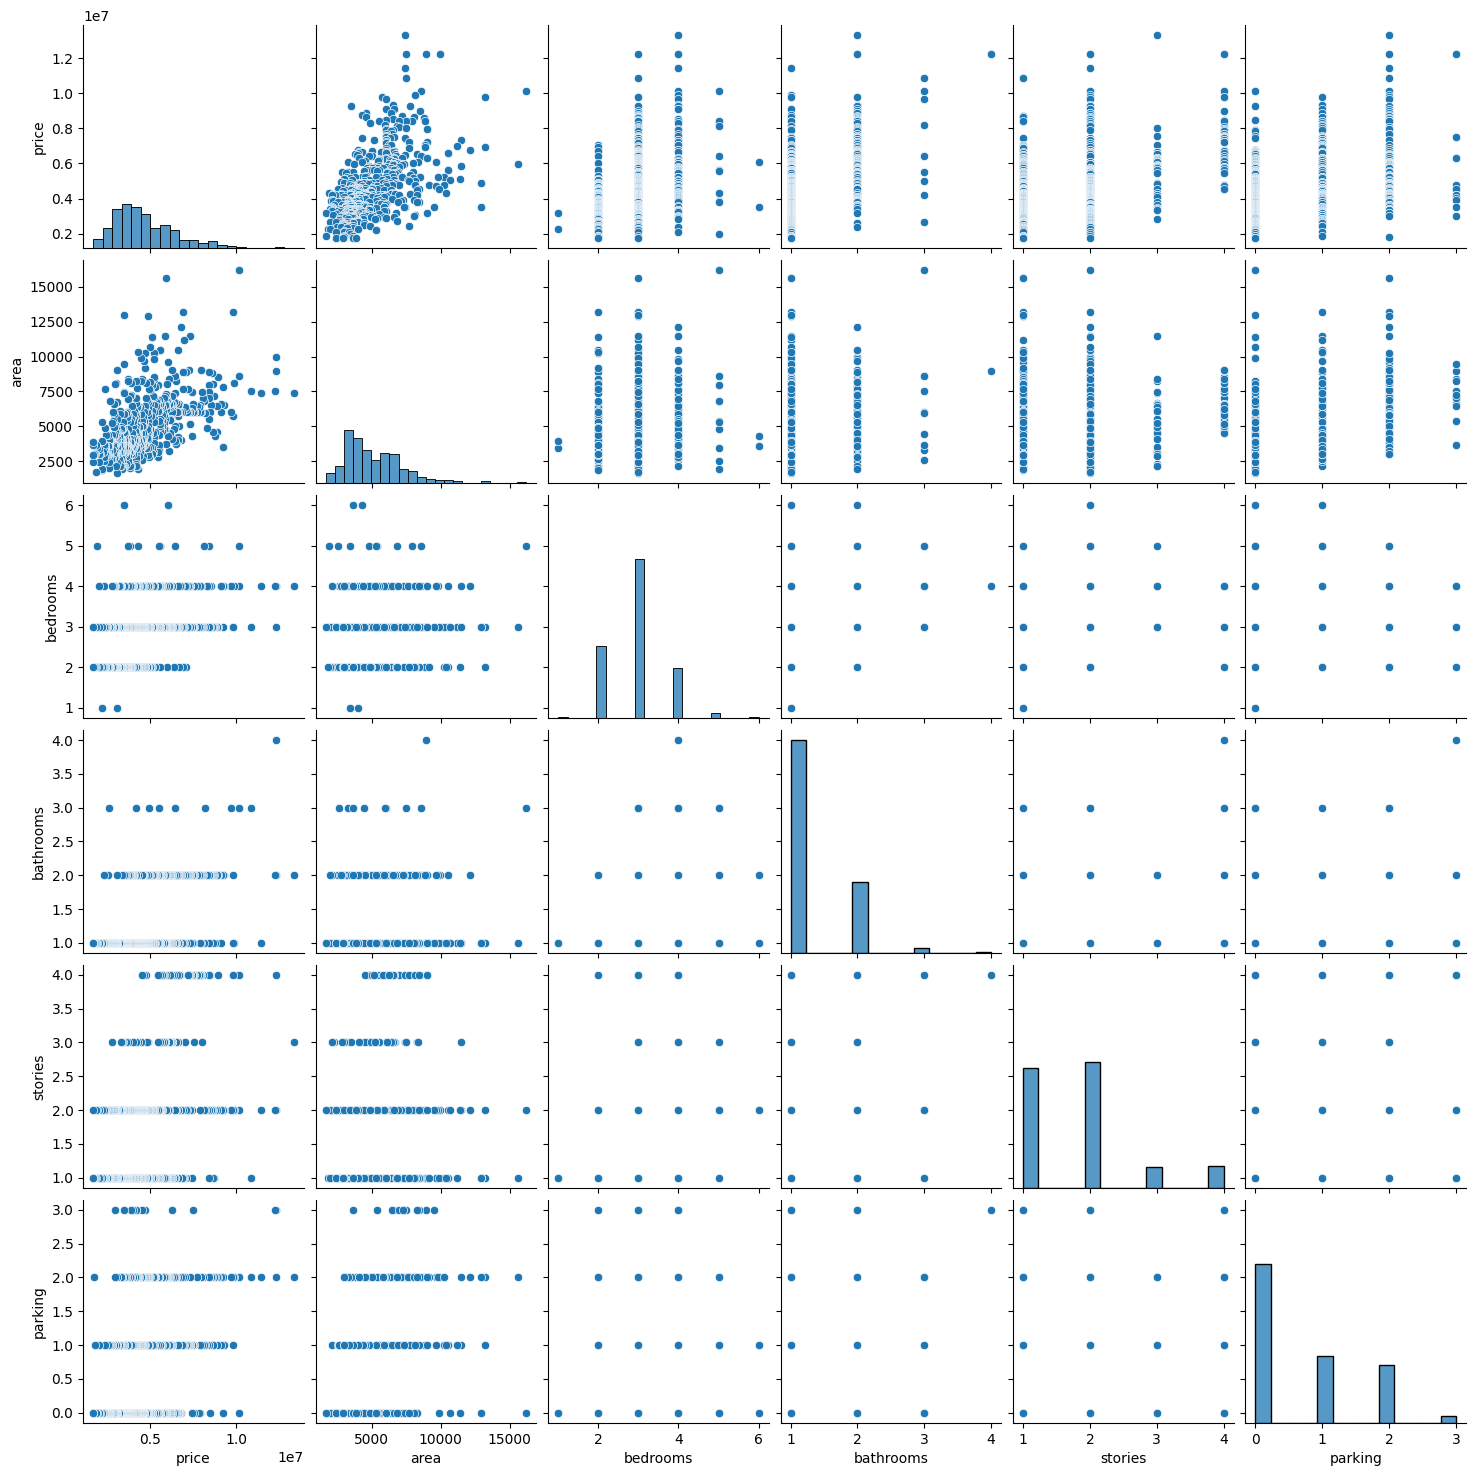

In [17]:
sns.pairplot(df)

<Axes: xlabel='price', ylabel='Count'>

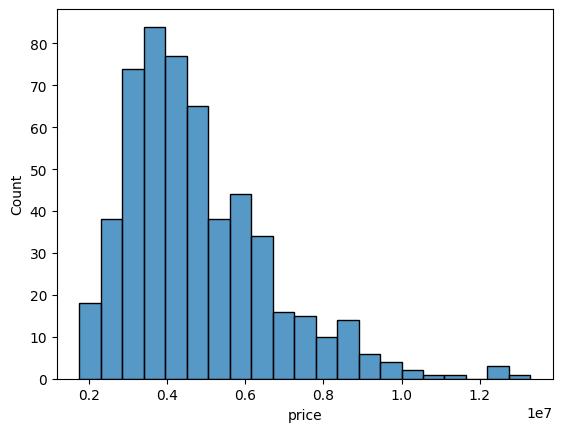

In [ ]:
sns.histplot(df['price'])

# deprecated `seaborn.distplot
# https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

## Model Selection

The simplicity and interpretability of linear regression make it a popular supervised learning algorithm for predicting house prices. The algorithm assumes a linear relationship between input features / X (area, bedrooms, bathrooms, stories and parking) and the target variable / y (price). [2]

## Model Training

### Independent and Dependent variables

In [27]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] # numerical data only.
y = df['price']

# Handle Categorical Variables in Regression
# https://www.geeksforgeeks.org/machine-learning/how-to-handle-categorical-variables-in-regression/

### Splitting the Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [42]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(327, 5)
(218, 5)
(327,)
(218,)


### Importing and Training Model

In [30]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Prediction

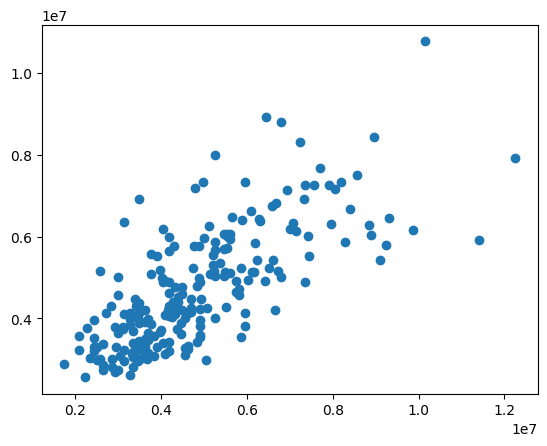

In [31]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [66]:
# ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
predicted_price = lm.predict([[7420, 4, 2, 3, 2]])
print(predicted_price[0])

warnings.filterwarnings('ignore')

7663382.780484932


## Model Evaluation

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 900485.3566224392
MSE: 1554656659048.5005
RMSE: 1246858.7165547267


## References

1. Linear Regression in Machine Learning
    - https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

2. House Price Prediction: A Simple Guide with Scikit-Learn and Linear Regression
    - https://medium.com/@kaushiksimran827/house-price-prediction-a-simple-guide-with-scikit-learn-and-linear-regression-f91a27b9d650

3. Housing Prices Dataset
    - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download